# 2023-06-23__Vm_traces_AdEx_Izh

In [1]:
using Units

In [4]:
using GlobalMacros

In [19]:
@typed begin
    # AdEx LIF neuron params (cortical RS from Naud 2008)
    C  = 104  * pF
    gₗ = 4.3  * nS
    Eₗ = -65  * mV
    Vₜ = -52  * mV
    Δₜ = 0.8  * mV 
    Vₛ =  40  * mV
    Vᵣ = -53  * mV
    a  = 0.8  * nS
    b  =  65  * pA
    τw =  88  * ms  
end;

https://github.com/JuliaMath/LambertW.jl

In [8]:
using LambertW

In [15]:
Eₜ = Eₗ - Δₜ * lambertw(-exp((Eₗ-Vₜ)/Δₜ), -1);

In [16]:
Eₜ / mV

-49.63585597104162

In [18]:
k = gₗ / (Eₜ - Eₗ)

2.798724088953702e-7

In [29]:
izh(V, I) = ( k*(V - Eₗ)*(V - Eₜ) -I ) / C
adex(V, I) = ( -gₗ*(V - Eₗ) + gₗ * Δₜ * exp((V-Vₜ)/Δₜ) -I ) / C;

In [22]:
Δt = 0.1ms
T = 400ms
N = round(Int, T/Δt)

4000

In [34]:
function sim(F, I)
    Vs = []
    V = Vᵣ
    for i in 1:N
        V += F(V, I[i]) * Δt
        if V > Vₛ
            V = Vᵣ
        end
        push!(Vs, V)
    end
    return Vs
end;

In [68]:
I = randn(N) * 5pA .- 11pA;

In [69]:
using PhDPlots

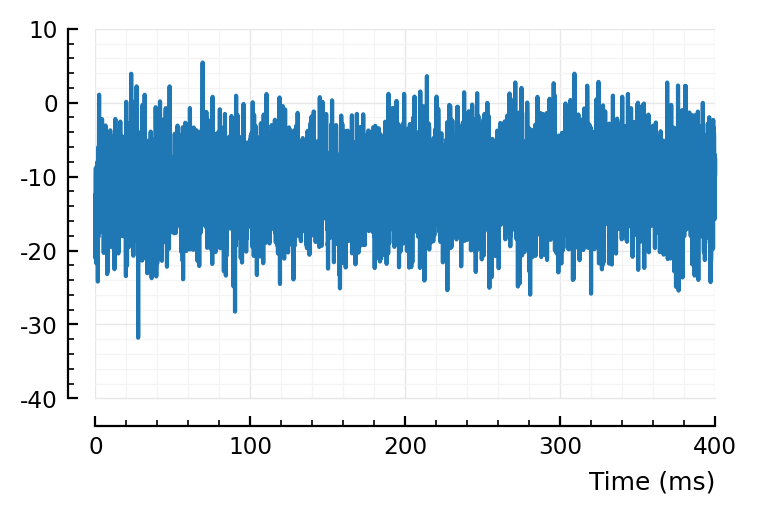

In [74]:
plotsig(I / pA, nothing, ms);

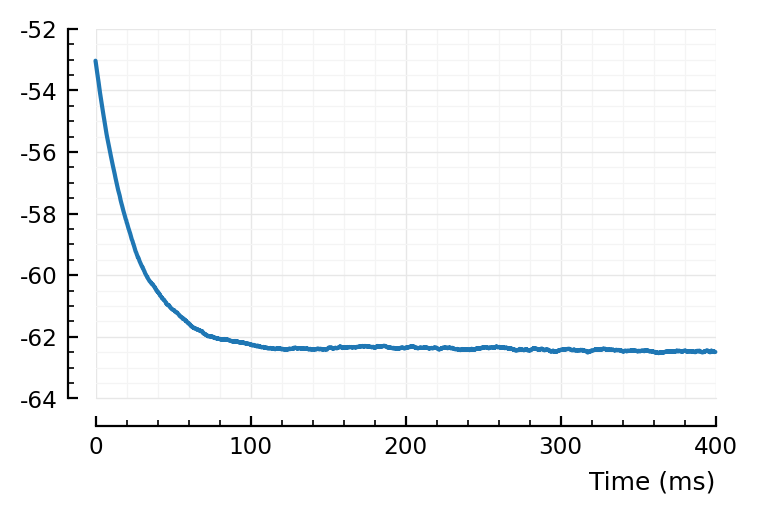

In [75]:
v = sim(adex, I)
plotsig(v / mV, nothing, ms);